## Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
col_name = ['EngineNo', 'Cycle']
opt_settings = ['OpSet1', 'OpSet2', 'OpSet3']
sensor_data = ['FanInletTemp', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp', 'FanInletPressure',
              'ByPassDuctPressure', 'TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed',
              'EnginePressureRatio', 'StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed', 'CorctCoreSpeed', 'BPR', 
              'BurnerFuelRatio', 'BleedEnthalpy', 'DemandFanSpeed', 'DemandCorctFanSpeed', 'HPTCoolantBleed', 'LPTCoolantBleed']

In [3]:
df_raw = pd.read_csv('CMAPSSData/train_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)
df_test = pd.read_csv('CMAPSSData/test_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)
df_test_rul = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None, names=['RUL'])

In [4]:
df_raw

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
df_raw.columns.values

array(['EngineNo', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'FanInletTemp',
       'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp',
       'FanInletPressure', 'ByPassDuctPressure', 'TotalHPCOutletPressure',
       'PhysicalFanSpeed', 'PhysicalCoreSpeed', 'EnginePressureRatio',
       'StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed',
       'CorctCoreSpeed', 'BPR', 'BurnerFuelRatio', 'BleedEnthalpy',
       'DemandFanSpeed', 'DemandCorctFanSpeed', 'HPTCoolantBleed',
       'LPTCoolantBleed'], dtype=object)

In [6]:
df_test

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [7]:
df_raw.describe()

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Create feature RUL for train and test data

### Train Data RUL

In [8]:
df_raw.head()

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
# From the grouped data, use the cycle coulmn and find the max 
max_cycle = df_raw.groupby('EngineNo')['Cycle'].max()
max_cycle

EngineNo
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: Cycle, Length: 100, dtype: int64

In [10]:
# Merge the max cycle column with the df column
df_train = df_raw.merge(max_cycle.to_frame(name='max_cycle'), left_on='EngineNo', right_index=True)
del(df_raw)
df_train

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [11]:
df_train_rul = df_train.copy()
df_train_rul['RUL'] = df_train_rul.max_cycle - df_train_rul.Cycle
df_train_rul.drop('max_cycle', axis=1, inplace=True)
df_train_rul

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [12]:
# Here we can see the remaining_cycle getting reduced
df_train_rul[['EngineNo','Cycle','RUL']]

,EngineNo,Cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
20626,100,196,4
20627,100,197,3
20628,100,198,2
20629,100,199,1


### Test Data RUL

In [13]:
df_test.groupby('EngineNo')['Cycle'].max()

EngineNo
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: Cycle, Length: 100, dtype: int64

In [14]:
max_cycle_test = df_test.groupby('EngineNo')['Cycle'].max()
if 'EngineNo' not in df_test_rul:
    df_test_rul.insert(0,'EngineNo',range(1,1+len(df_test_rul)))
df_test_rul_merge = df_test_rul.merge(max_cycle_test.to_frame(name='max_cycle_test'), how='inner', on='EngineNo')
new_col = df_test_rul_merge.max_cycle_test + df_test_rul_merge.RUL
if 'RULMax' not in df_test_rul_merge:
    df_test_rul_merge.insert(loc=2,column='RULMax',value=new_col)
if 'RUL' in df_test_rul_merge:
    df_test_rul_merge.drop('RUL',axis=1,inplace=True)
df_test_rul_merge.drop('max_cycle_test',axis=1,inplace=True)
df_test_with_rul = pd.merge(df_test,df_test_rul_merge, on='EngineNo')
rul_dif = df_test_with_rul.RULMax - df_test_with_rul.Cycle
if 'RUL' not in df_test_with_rul:
    df_test_with_rul['RUL'] = rul_dif
if 'RULMax' in df_test_with_rul:
    df_test_with_rul.drop('RULMax',axis=1,inplace=True)
df_test_with_rul 

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


## Feature Selection

In [15]:
def plot_for_engine(eng_num):
    '''
    A function to plot all sensor reading by giving the engine number as the input.
    '''
    fig, ax = plt.subplots(7,3, figsize=(100,100))
    count = 0
    for i in range(7):
        for j in range(3):
            # sen_num = 'SensorMeasure'+str(count)
            # sns.set_theme(font_scale=1.5)
            sns.lineplot(ax=ax[i,j],x='Cycle', y=sensor_data[count], data=df_train_rul[df_train_rul.EngineNo==eng_num])
            count+=1
    plt.savefig('engine'+str(eng_num)+'.png')

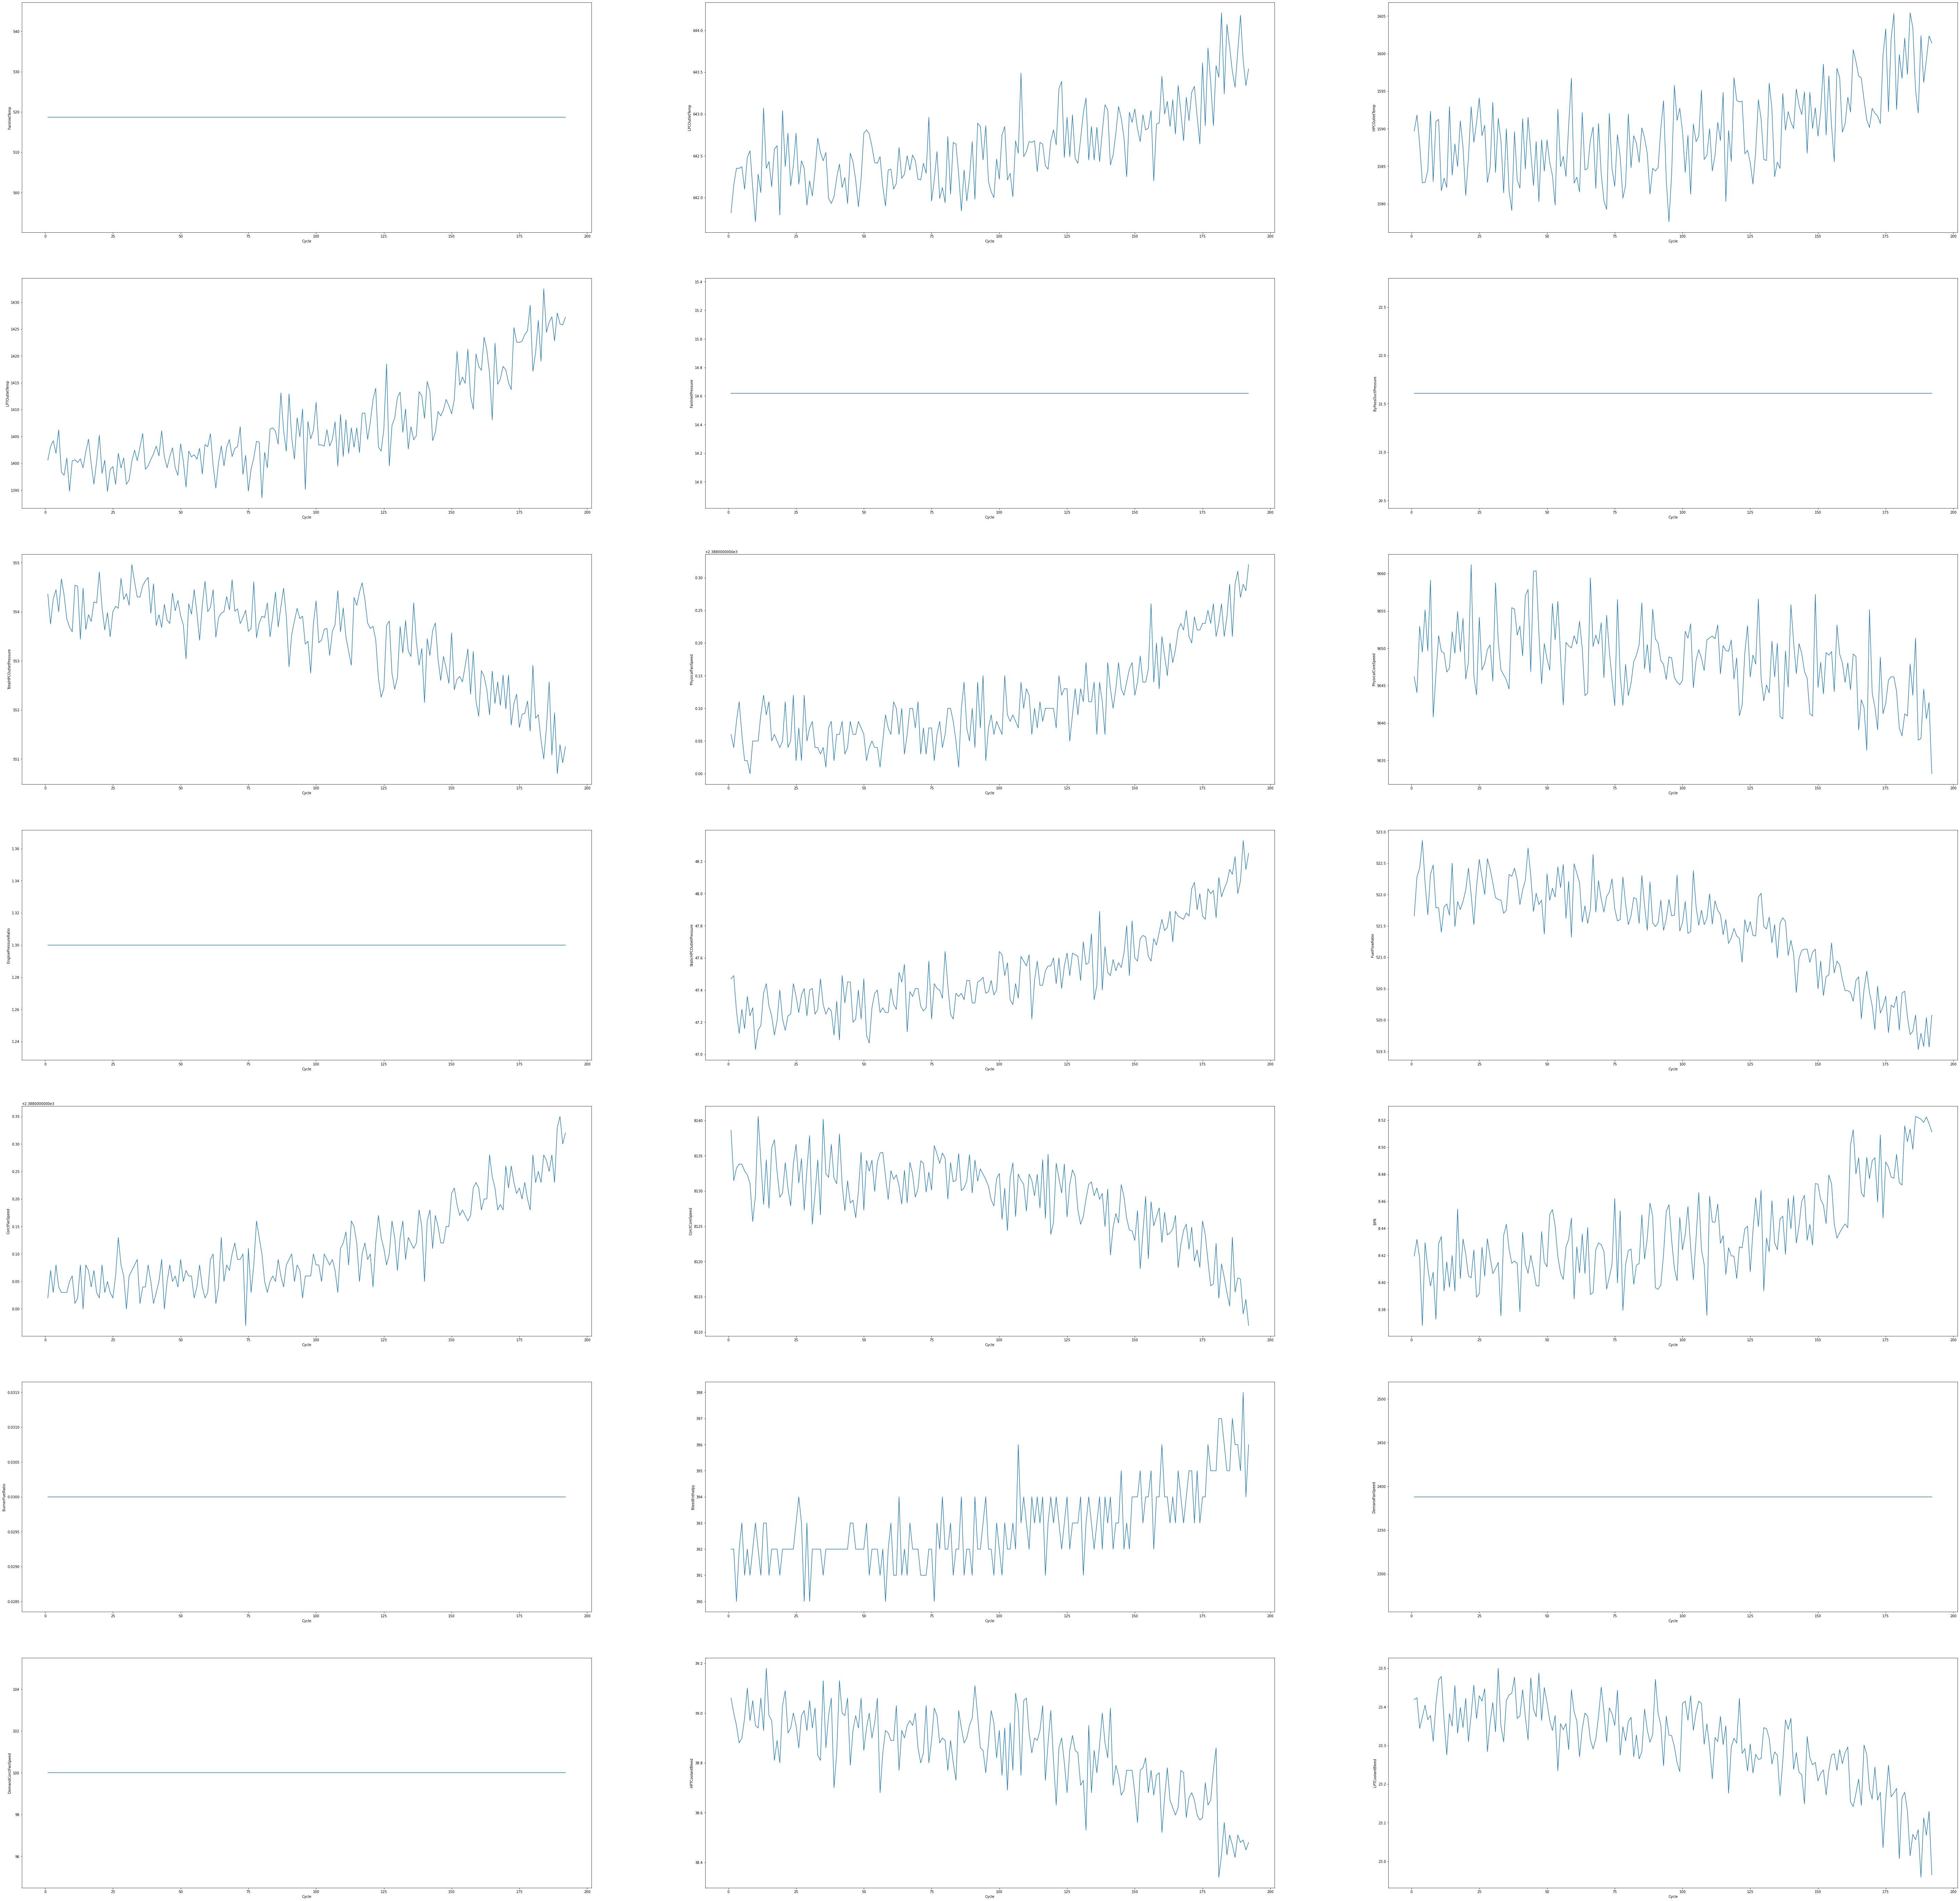

In [16]:
plot_for_engine(1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
X, y = df_train_rul.drop(['RUL','EngineNo','Cycle'], axis=1), df_train_rul['RUL']
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [18]:
selected_features_rfc= X.columns[(sel.get_support())]
print(len(selected_features_rfc))
print(selected_features_rfc)

15
Index(['OpSet1', 'OpSet2', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp',
       'TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed',
       'StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed',
       'CorctCoreSpeed', 'BPR', 'HPTCoolantBleed', 'LPTCoolantBleed'],
      dtype='object')


In [19]:
#Removing unnecessary Columns from train and test data

df_train_cleaned = df_train_rul.filter(['EngineNo','Cycle','OpSet1', 'OpSet2', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp','TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed','StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed','CorctCoreSpeed', 'BPR', 'HPTCoolantBleed', 'LPTCoolantBleed','RUL'], axis=1)
df_test_cleaned = df_test_with_rul.filter(['EngineNo','Cycle','OpSet1', 'OpSet2', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp','TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed','StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed','CorctCoreSpeed', 'BPR', 'HPTCoolantBleed', 'LPTCoolantBleed','RUL'], axis=1)
                        

In [20]:
df_train_cleaned.head()

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,38.90,23.4044,187


In [21]:
df_test_cleaned.head()

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,38.99,23.4130,138


## Normalization of Train and Test data

In [22]:
from sklearn import preprocessing

### Train Data Normalization

In [23]:
scaler = preprocessing.MinMaxScaler()
names = df_train_cleaned.iloc[:,2:-1].columns
scaled_data = scaler.fit_transform(df_train_cleaned.iloc[:,2:-1])
df_train_scaled = pd.concat([df_train_cleaned.iloc[:,0:2], pd.DataFrame(scaled_data, columns=names),df_train_cleaned.iloc[:,-1]], axis=1)
df_train_scaled

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.589147,0.704502,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.271318,0.109500,4
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.124031,0.366197,3
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.232558,0.053991,2
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.116279,0.234466,1


### Train Data Normalization

In [24]:
scaler = preprocessing.MinMaxScaler()
names = df_test_cleaned.iloc[:,2:-1].columns
scaled_data = scaler.fit_transform(df_test_cleaned.iloc[:,2:-1])
df_test_scaled = pd.concat([df_test_cleaned.iloc[:,0:2], pd.DataFrame(scaled_data, columns=names),df_test_cleaned.iloc[:,-1]], axis=1)
df_test_scaled

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.500000,0.620099,142
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.645455,0.645718,141
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.700000,0.681104,140
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.627273,0.620382,139
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.618182,0.676008,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.935703,0.664909,0.309091,0.370842,24
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.914003,0.567593,0.236364,0.483652,23
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.971066,0.594919,0.281818,0.381741,22
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,1.000000,0.662991,0.318182,0.473461,21


## Adding Target Label to the dataset

In [25]:
cycle=30
df_train_scaled['main_threshold'] = df_train_scaled['RUL'].apply(lambda x: 1 if x <= cycle else 0)
df_test_scaled['main_threshold'] = df_test_scaled['RUL'].apply(lambda x: 1 if x <= cycle else 0)

In [26]:
df_train_scaled

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL,main_threshold
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.713178,0.724662,191,0
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.666667,0.731014,190,0
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.627907,0.621375,189,0
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.573643,0.662386,188,0
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.589147,0.704502,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.271318,0.109500,4,1
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.124031,0.366197,3,1
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.232558,0.053991,2,1
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.116279,0.234466,1,1


In [27]:
df_train_scaled.main_threshold.value_counts()

0    17531
1     3100
Name: main_threshold, dtype: int64

In [28]:
df_test_scaled

,EngineNo,Cycle,OpSet1,OpSet2,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,TotalHPCOutletPressure,PhysicalFanSpeed,PhysicalCoreSpeed,StaticHPCOutletPressure,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,HPTCoolantBleed,LPTCoolantBleed,RUL,main_threshold
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.500000,0.620099,142,0
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.645455,0.645718,141,0
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.700000,0.681104,140,0
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.627273,0.620382,139,0
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.618182,0.676008,138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.935703,0.664909,0.309091,0.370842,24,1
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.914003,0.567593,0.236364,0.483652,23,1
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.971066,0.594919,0.281818,0.381741,22,1
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,1.000000,0.662991,0.318182,0.473461,21,1


In [29]:
df_test_scaled.main_threshold.value_counts()

0    12764
1      332
Name: main_threshold, dtype: int64

## Model Creation

In [30]:
X, y = df_train_scaled.drop(['RUL','EngineNo','Cycle','main_threshold'], axis=1), df_train_scaled['main_threshold']

In [41]:
Xt, yt = df_test_scaled.drop(['RUL','EngineNo','Cycle','main_threshold'], axis=1), df_test_scaled['main_threshold']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=5)
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 15)
X_test shape :  (4127, 15)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [33]:
from lazypredict.Supervised import LazyClassifier
lazyp_model = LazyClassifier(predictions=True)
models, predictions = lazyp_model.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:49<00:00,  1.71s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.94,0.95,0.95,0.94,0.03
NearestCentroid,0.93,0.95,0.95,0.93,0.06
SGDClassifier,0.96,0.92,0.92,0.96,0.08
Perceptron,0.96,0.92,0.92,0.96,0.04
LinearSVC,0.96,0.92,0.92,0.96,0.32
CalibratedClassifierCV,0.96,0.92,0.92,0.96,1.61
LogisticRegression,0.96,0.92,0.92,0.96,0.18
PassiveAggressiveClassifier,0.87,0.92,0.92,0.88,0.04
LGBMClassifier,0.96,0.92,0.92,0.96,0.21


In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [33]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=5000,num_leaves=100,objective='binary', metrics='auc',random_state=50,n_jobs=-1)
lgb_clss.fit(X_train, y_train)
lgb_clss.score(X_test, y_test)
preds2 = lgb_clss.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

Acc Score:  0.9600193845408287
Roc Auc Score:  0.9146165791369093
Precision Score:  0.8795986622073578
Recall Score:  0.8497576736672051
f1 score:  0.8644207066557107


In [42]:
test_pred_lgb = lgb_clss.predict(Xt)

In [44]:
accuracy_score(yt,test_pred_lgb)

0.884850335980452

**LGBM Classifier:**

**Train data accuracy : 96%,**
**Test data accuracy : 88.48%**

In [46]:
from sklearn.naive_bayes import GaussianNB  
nb_cls = GaussianNB()  
nb_cls.fit(X_train, y_train)  
nb_cls.score(X_test, y_test)
preds_gnb = nb_cls.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds_gnb))
print('Roc Auc Score: ',roc_auc_score(y_test, preds_gnb))
print('Precision Score: ',precision_score(y_test, preds_gnb))
print('Recall Score: ',recall_score(y_test, preds_gnb))
print('f1 score: ',f1_score(y_test, preds_gnb))

Acc Score:  0.9377271625878362
Roc Auc Score:  0.9520606488193154
Precision Score:  0.7149643705463183
Recall Score:  0.9725363489499192
f1 score:  0.8240930869267625


In [47]:
test_pred_nb = nb_cls.predict(Xt)
accuracy_score(yt,test_pred_nb)

0.7882559560171044

**Naive Bayes Classifier:**

**Train data accuracy : 93%,**
**Test data accuracy : 78.82%**